# Car Prediction



##Introducción y descripción del dataset

Esta base de datos contiene datos detallados sobre diferentes modelos de autos usados a la venta, con sus características técnicas, equipamiento, precio y otra información relevante.

El dataset fue descargado desde kaggle: https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge



###Features


* ID: Identificador único de cada auto
* Price: Precio del auto
* Levy: Impuesto agregado al precio total
* Manufacturer: Fabricante del auto
* Model: Modelo del auto
* Prod. year: Año de producción del auto
* Category: Categoría del auto
* Leather interior: Si el interior es de cuero o no (Yes/No)
* Fuel type: Tipo de combustible
* Engine volume: Cilindrada del motor
* Mileage: El millaje del auto
* Cylinders: Cantidad de cilindros
* Gear box type: Tipo de caja de cambios (Automática, Manual, etc.)
* Drive wheels: Ruedas motrices (4x4, Tracción delantera, etc.)
* Doors: Cantidad de puertas
* Wheel: Ubicación del volante (Izquierda / Derecha)

* Color: Color del automóvil
* Airbags: Número de airbags



### Objetivos del estudio

- Predecir el precio de un automóvil en función de sus características (año, kilometraje, cilindrada, etc.)

- Descubrir que variables son importantes para predecir el precio de un auto

- Analizar tendencias de popularidad por marca, modelo, categoría.

- Estudiar el impacto de ciertas características (transmisión, combustible, etc.) en el precio.


###Hipótesis
Se hipotetiza que:



* El precio del automóvil está fuertemente correlacionado con el año de producción, el millaje y el tamaño del motor.

* El tipo de combustible (gasolina, diésel, híbrido) impacta significativamente en el precio.
* La transmisión automática (caja de cambios) aumenta el precio en comparación con la transmisión manual.
*  Características como cuero interior, número de airbags y ruedas 4x4 están asociadas a precios más elevados.
* El precio disminuye a medida que aumenta el kilometraje, pero en mayor o menor medida dependiendo de la antigüedad del vehículo.
* Existen relaciones entre ciertas variables (por ejemplo, motores más grandes suelen ir con vehículos más nuevos y mayor equipamiento).
* Ciertos colores o categorías podrían tener mayor precio que otros.




##Importación de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#Modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb
from sklearn.tree import DecisionTreeRegressor


# Para normalización / preprocesamiento
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

!pip install category_encoders
from category_encoders import LeaveOneOutEncoder

lab = LabelEncoder()

# Warnings a saltar
warnings.filterwarnings('ignore')



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.0 MB/s eta 0:00:00


In [2]:
#Lectura database
df = pd.read_csv('https://raw.githubusercontent.com/JotaLeutgeb/proyectofinalDS1/main/Car_Prediction/car_price_prediction.csv')


## Análisis exploratorio (EDA)

In [3]:
df.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
# Verificación de nulos
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

Ninguna fila con datos nulos.

In [6]:
# Verificación de cuantos valores únicos tienen las variables
for col in df.columns:
    print(f"Columna {col} : {df[col].nunique()}")
    print("----"*9)

Columna ID : 18924
------------------------------------
Columna Price : 2315
------------------------------------
Columna Levy : 559
------------------------------------
Columna Manufacturer : 65
------------------------------------
Columna Model : 1590
------------------------------------
Columna Prod. year : 54
------------------------------------
Columna Category : 11
------------------------------------
Columna Leather interior : 2
------------------------------------
Columna Fuel type : 7
------------------------------------
Columna Engine volume : 107
------------------------------------
Columna Mileage : 7687
------------------------------------
Columna Cylinders : 13
------------------------------------
Columna Gear box type : 4
------------------------------------
Columna Drive wheels : 3
------------------------------------
Columna Doors : 3
------------------------------------
Columna Wheel : 2
------------------------------------
Columna Color : 16
-------------------------

In [7]:
# Verificación de qué valores únicos tienen las variables
for col in df.columns:
    print(f'Valores únicos de {col}:\n {df[col].unique()}\n')
    print('--'*40)

Valores únicos de ID:
 [45654403 44731507 45774419 ... 45804997 45793526 45813273]

--------------------------------------------------------------------------------
Valores únicos de Price:
 [13328 16621  8467 ... 56814 63886 22075]

--------------------------------------------------------------------------------
Valores únicos de Levy:
 ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598'

In [8]:
# Estadísticas generales de las columnas numéricas
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


### conclusiones luego del EDA

Se identificaron varios valores con formatos incorrectos en las siguientes columnas:


*   Levy: el valor "-" es incorrecto ya que esta debe ser una columna numérica
*   Engine_volume: Se ve que varios campos tienen la palabra "turbo"
*   Mileage: Se debe hacer una columna numérica trundando el "km"
*   Cylinders:
  * Los valores se muestran como float pero son todos enteros
  * Los 3 cuartiles (25%, 50%,75%) tienen el mismo valor, hay que verificar si el máximo hay queconsiderarlo outlier o dejarlo en el análisis
*   Doors: Está en el formato incorrecto, esto debe indicar la cantidad de peurtas.
*   Price: El mínimo y el máximo parecen ser incorrectos considerando la distribución en los cuartiles (posibles outliers).






###Organización y cambios preliminares en columnas

In [9]:
# Paso previo para buena práctica en nombres de columnas
df.rename(columns={'Prod. year': 'Prod year'}, inplace=True)

In [10]:
# Reemplazamos todos los espacios en las columnas por "_"
df.columns = [col.replace(' ', '_') for col in df.columns]

In [11]:
#Vistazo general para veríficar como quedar las columnas definitivamente.
df.columns.tolist()

['ID',
 'Price',
 'Levy',
 'Manufacturer',
 'Model',
 'Prod_year',
 'Category',
 'Leather_interior',
 'Fuel_type',
 'Engine_volume',
 'Mileage',
 'Cylinders',
 'Gear_box_type',
 'Drive_wheels',
 'Doors',
 'Wheel',
 'Color',
 'Airbags']

***Columnas organizadas ✅***

##Limpieza

###Limpieza general del *DataFrame*

In [12]:
# Contamos cantidad de filas duplicadas
df.duplicated().sum()

313

In [13]:
# Eliminamos las filas duplicadas
df.drop_duplicates(inplace=True)

Filas duplicadas eliminadas ✅

In [14]:
#Dropeamos ID
df = df.drop(['ID'],axis=1)

Eliminación de la columna `'ID'`, ya que tenemos una por defecto

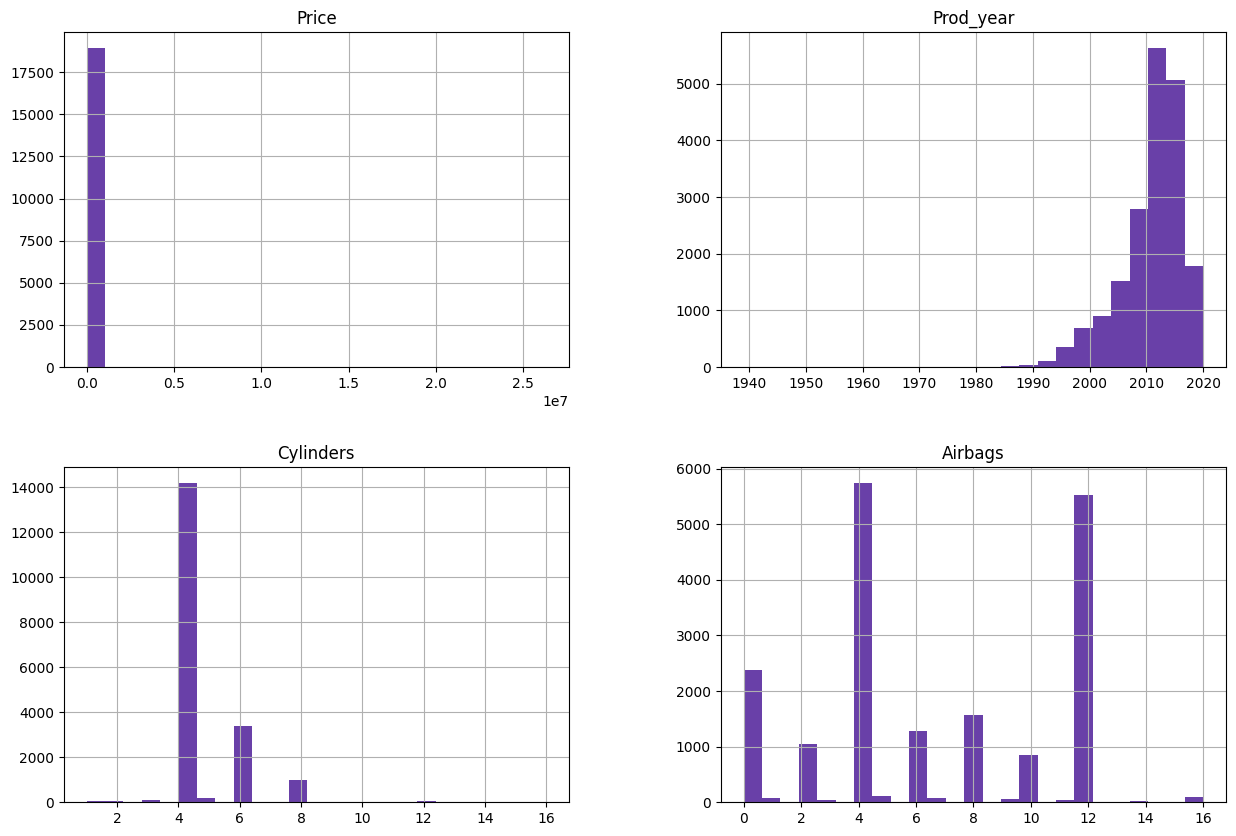

In [15]:

df.hist(bins=25,figsize=(15,10),color='#6940A8')
plt.show()

Vistazo general de las variables numéricas.

### Limpieza `'Levy'`

In [16]:
df['Levy'].value_counts()

-       5709
765      482
891      453
639      403
640      398
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

In [17]:
(df['Levy'] == '-').sum()

5709

Se tomó la decisión de no borrar sino reemplazar los valores de Levy igulaes a '-'

In [18]:
# Se rellenan los valores vacíos de levy con la mediana
df['Levy'] = df['Levy'].replace('-',pd.NA)
df["Levy"]=df["Levy"].fillna(df["Levy"].median())


# Hacemos enteros los valores
df['Levy'] = pd.to_numeric(df['Levy']).astype(int)

df['Levy'].head(10)

0    1399
1    1018
2     781
3     862
4     446
5     891
6     761
7     751
8     394
9     781
Name: Levy, dtype: int64

Reemplazo de "-" por la media del resto de valores en `'Levy'` para tener solo ints en la columna.

***Limpieza `'Levy'` ✅***

###Limpieza `'Engine_volume'`

In [19]:
#Engine_Volume no debería ser objeto, eliminación de "Turbo"
df['Engine_volume'] = df['Engine_volume'].str.replace('Turbo',"")

In [20]:
# Se mantiene en float ya que se aceptan decimales en el volumen del motor.
df['Engine_volume'] = df['Engine_volume'].astype('float')
df['Engine_volume']

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine_volume, Length: 18924, dtype: float64

***Limpieza `Engine_Volume` ✅***

###Limpieza `'Mileage'`

In [21]:
# Mileage no debería ser un objeto, eliminación de "km"
df['Mileage'] = df['Mileage'].str.replace('km',"")

In [22]:
df['Mileage'] = df['Mileage'].astype('int')

***Limpieza `Mileage`✅***



###Limpieza `'Cylinders'`

In [23]:
# los datos no deberían ser float, sino int
df['Cylinders'] = df['Cylinders'].astype(int)
df['Cylinders']

0        6
1        6
2        4
3        4
4        4
        ..
19232    4
19233    4
19234    4
19235    4
19236    4
Name: Cylinders, Length: 18924, dtype: int64

### Limpieza `'Doors'`

In [24]:
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

Como se puede ver, la columna doors tiene 1 valor numérico, y seguido un mes.

In [25]:
def reemplazar_doors(valor):
  # Hay solo 3 valores en el dataframe: ['04-May', '02-Mar', '>5']
    if valor == '04-May':
        return '4-5'
    elif valor == '02-Mar':
        return '2-3'
    else:
        return valor # Si no aplican los condicionales anteriores, se mantiene el '>5'

In [26]:
df['Doors'] = df['Doors'].astype(str)
df['Doors'] = df['Doors'].apply(reemplazar_doors)
df['Doors']

0        4-5
1        4-5
2        4-5
3        4-5
4        4-5
        ... 
19232    2-3
19233    4-5
19234    4-5
19235    4-5
19236    4-5
Name: Doors, Length: 18924, dtype: object

In [27]:
df['Doors'].unique()

array(['4-5', '2-3', '>5'], dtype=object)

***Limpieza `'Doors'`✅***

### Limpieza `'Airbags'`

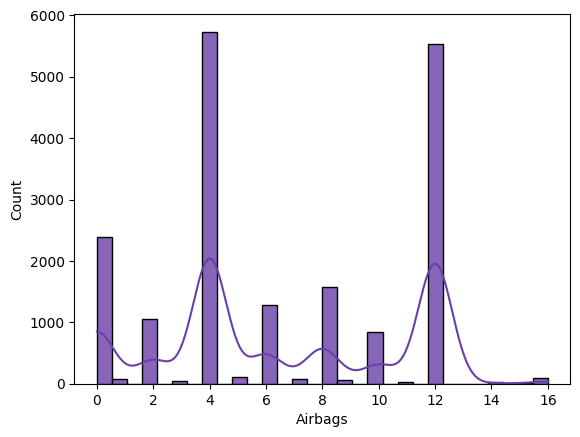

In [28]:
sns.histplot(data=df,x='Airbags', bins=30, color='#6940A8', alpha=0.8, kde=True)
plt.show()

Me llamó la atención la cantidad de autos sin airbags, pese a que el rango de años de producción en el dataframe es bastante amplio, debe verificarse para evitar valores erróneos

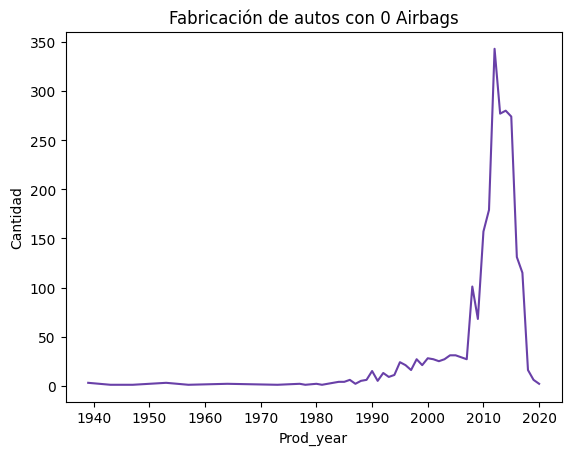

In [29]:
# Filtro el DataFrame donde Airbags == 0 y se cuenta cuanto tiene cada año
Analisis_Airbag = df[df['Airbags'] == 0].groupby('Prod_year').size()

# Graficamos
plot = sns.lineplot(data=Analisis_Airbag, color='#6940A8')
plot.set_title('Fabricación de autos con 0 Airbags')
plot.set_ylabel('Cantidad')

plt.show()

Claramente se encontró un error en los airbags, hay veces en la que indica 0 y eso no necesariamente está bien ya que los airbgas fueron reglamentarios a partir de 1998.

---

Aquellos valores que sean 0 a partir de ese año(Fecha en la que se volvieron obligatorios en USA), se reemplazarán por 2, que es el mínimo: (conductor y pasajero).

---

Probablemente queden airbags == 0, pero no serán valores erróneos sino correctos.

In [30]:
# Todos los airbags == 0 que estén por delante del 1998
df[(df['Airbags'] == 0) & (df['Prod_year'] >= 1998)]['Airbags'].count()

2222

In [31]:
# Los que sean ceros, e inferiores a 1998, se reemplazarán por 2 que es el mínimo reglamentario
df.loc[(df['Airbags'] == 0) & (df['Prod_year'] >= 1998), 'Airbags'] = 2

### Búsqueda de outliers

***Limpieza `'Airbags'` ✅***



####Identificación outliers

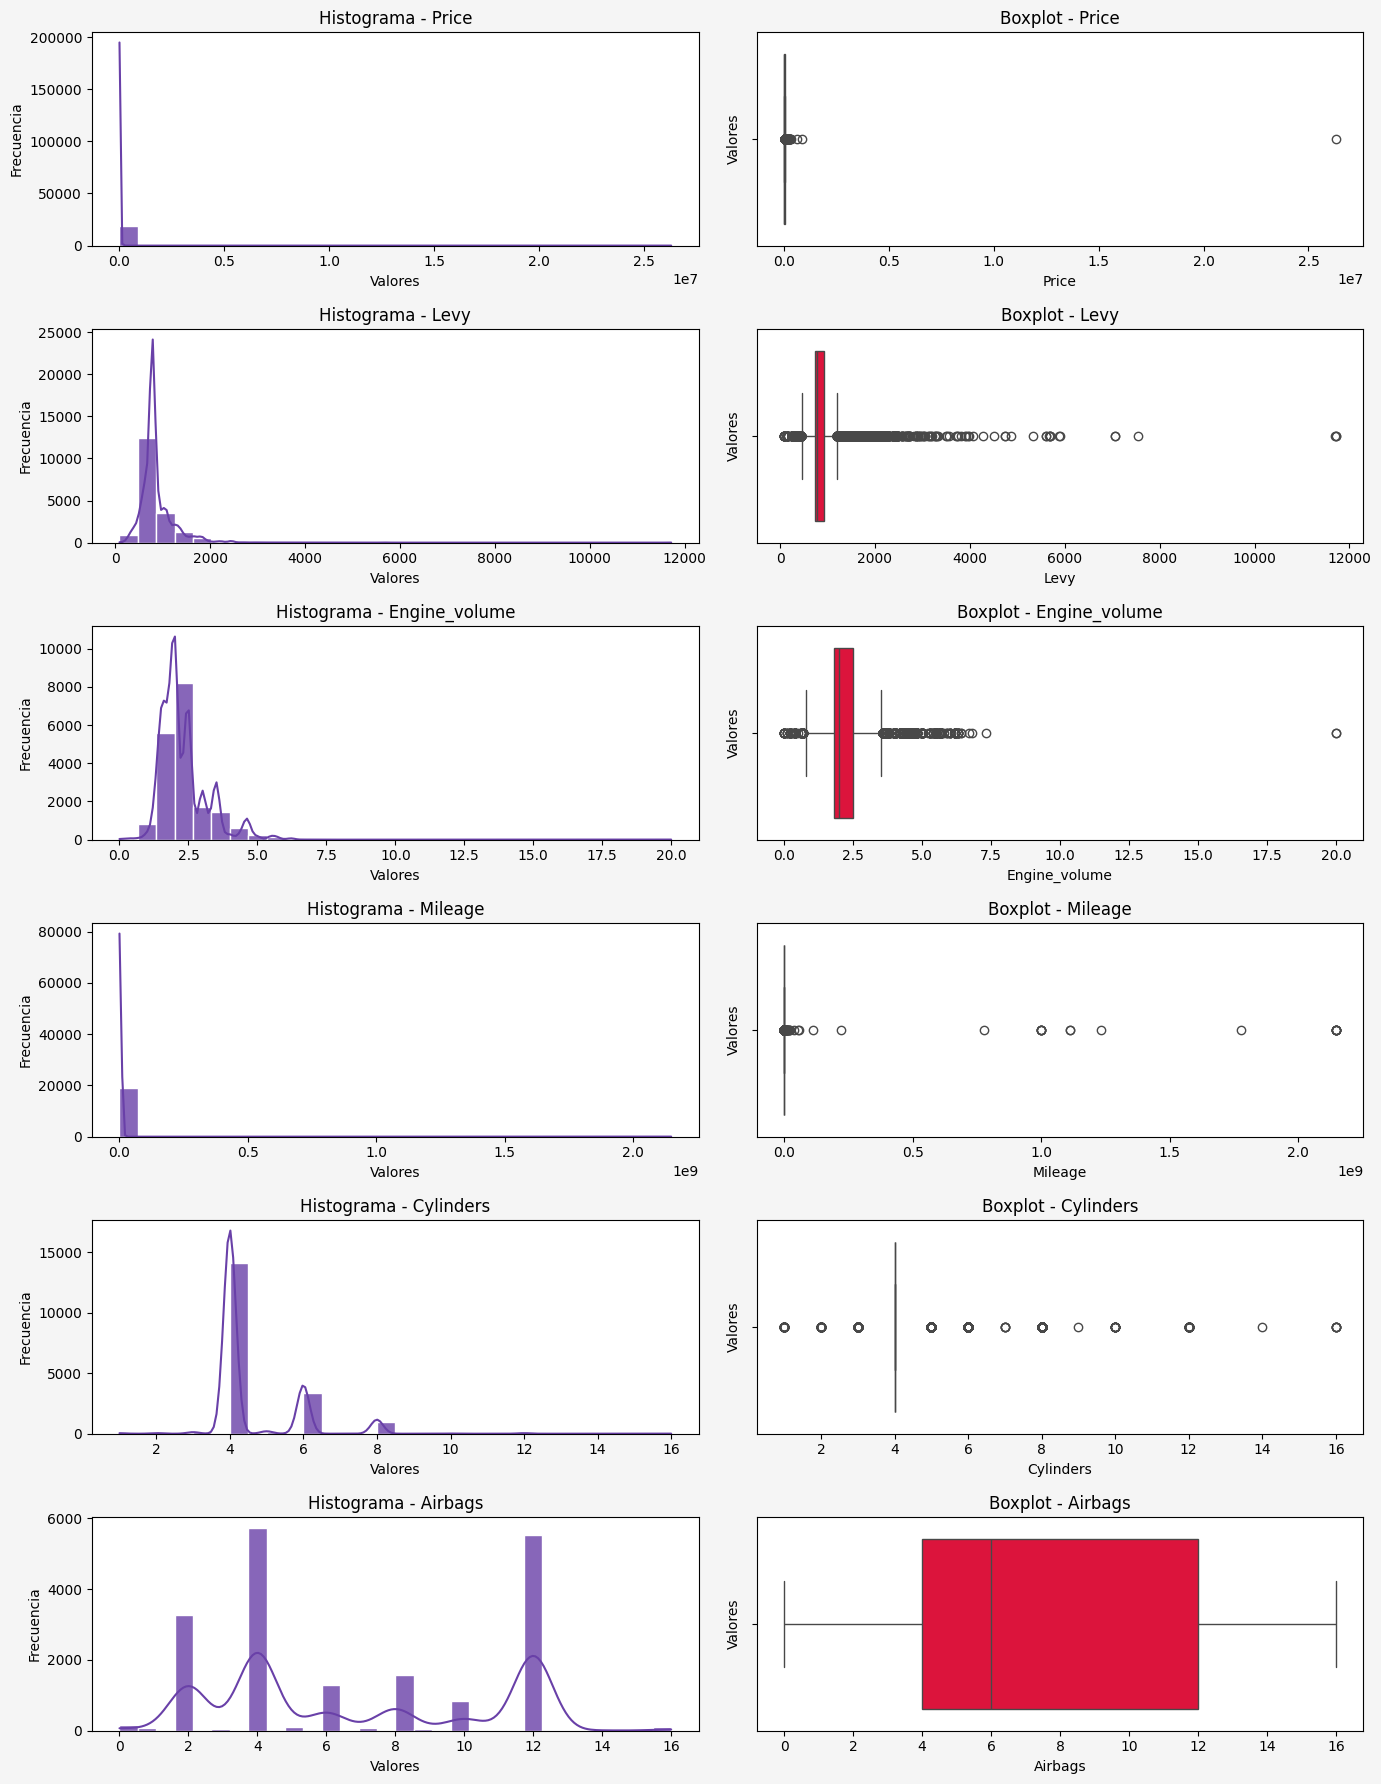

In [32]:
columnas_seleccionadas = ['Price', 'Levy','Engine_volume', 'Mileage','Cylinders', 'Airbags']

# Prepara una grilla de subplots con un gris claro
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(14, 18), facecolor='whitesmoke')
sns.set_theme(style='darkgrid')
# Itera a través de las columnas seleccionadas y hace histogramas y boxplots
for i, columna in enumerate(columnas_seleccionadas): #Enumerate permite iterar en una lista, returneando una tupla que contiene el índice de cada elemento y el elemento mismo.
    # Histograma
    sns.histplot(df[columna], bins=30, color='#6940A8', alpha=0.8, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histograma - {columna}')
    axes[i, 0].set_xlabel('Valores')
    axes[i, 0].set_ylabel('Frecuencia')

    # Boxplot
    sns.boxplot(x=df[columna], ax=axes[i, 1], color='crimson', boxprops=dict(facecolor='crimson'))
    axes[i, 1].set_title(f'Boxplot - {columna}')
    axes[i, 1].set_ylabel('Valores')


# Ajuste de espacio
plt.tight_layout()

# Muestra el gráfico
plt.show()

Viendo estos gráficos, se puede ver que hay muchísimos outliners

Habiendo limpiado los datos, el único que parece estar correcto es `'Airbag'`, por lo tanto, vamos a eliminar los valores atípicos en el resto de columnas

####Eliminación Outliers

Para la identificación de los outliers, voy a utilizar un méotodo llamado IQR o en español RIQ.


---


*El rango intercuartílico (RIC) es una medida de dispersión estadística que se utiliza para evaluar la variabilidad en el rango intermedio de un conjunto de datos, excluyendo los valores atípicos o extremos. *

---
El primer cuartil (Q1) es el valor que deja atrás al 25% más bajo de los datos, el segundo cuartil (Q2) es equivalente a la mediana y el tercer cuartil (Q3) es el valor que deja atrás al 75% más bajo de los datos.

Pasospara calcular el IQR:
1.   Determinar el RIC retandole q1 a q3
2.   Definir el límite inferior y superior
  -  límite inferior: Q1-1.5*IQR
  - Límite superior: Q3+1.5*IQR
3. Identificar valores atípicos:
- Cuaqluier dato sobre o debajo de los límites marcados, es considerado un potencial dato atípico.




In [33]:
#Lista de columnas a verificar sus outliers
columnas = ['Levy', 'Engine_volume', 'Mileage','Price']


# Dicionario para contar los outliers
outliers = {}

def eliminar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Definiendo el límite de los outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Encontrar y contar los outliers
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    contar_outliers = outliers.shape[0]

    # Eliminación de outliers del dataframe
    df_limpia = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]

    return df_limpia, contar_outliers

# Iteración de la función en cada columna y almacenamiento de los resultados
for columna in columnas:
    df, contar_outliers = eliminar_outliers(df, columna)
    outliers[columna] = contar_outliers

# Impresión de los resultados
print("Cantidad de Outliers:")
for columna, cant in outliers.items():
    print(f"{columna}: {cant}")

Cantidad de Outliers:
Levy: 3103
Engine_volume: 560
Mileage: 575
Price: 786


Se eligieron las columnas `'Levy', 'Engine_volume', 'Mileage','Price'` ya que basándonos en el punto anterior (identificación de outliers) se llegó a la conclusión de que esas columnas debían tener un ajuste de valores atípicos ya que afectarían gravemente al modelo.

---



###Limpieza `'Price'`

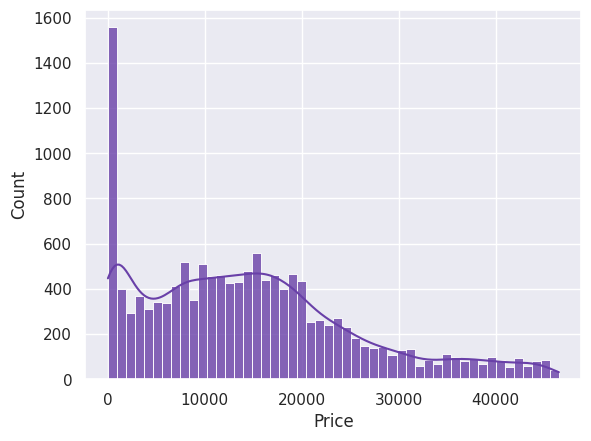

In [34]:
sns.histplot(data=df,x='Price', bins=50, color='#6940A8', alpha=0.8, kde=True)
plt.show()

Analizando el precio se pueden ver muchos valores menores a 500, que parece un número demasiado bajo para ser considerado un dato válido

Eliminamos todos los valores <= 500 ya que se consideraron como valores erróneos

In [35]:
# Dejamos en el dataframe solo los valores mayores o iguales a 500
df = df[df['Price'] >= 500]

***Limpieza `'Price'`***✅

## Cambios después de la Limpieza

Ahora que hemos eliminado los outliners y limpiado las columnas identificadas, se puede ver una gran mejoría respecto a los valores atípicos en las variables anteriormente afectadas:

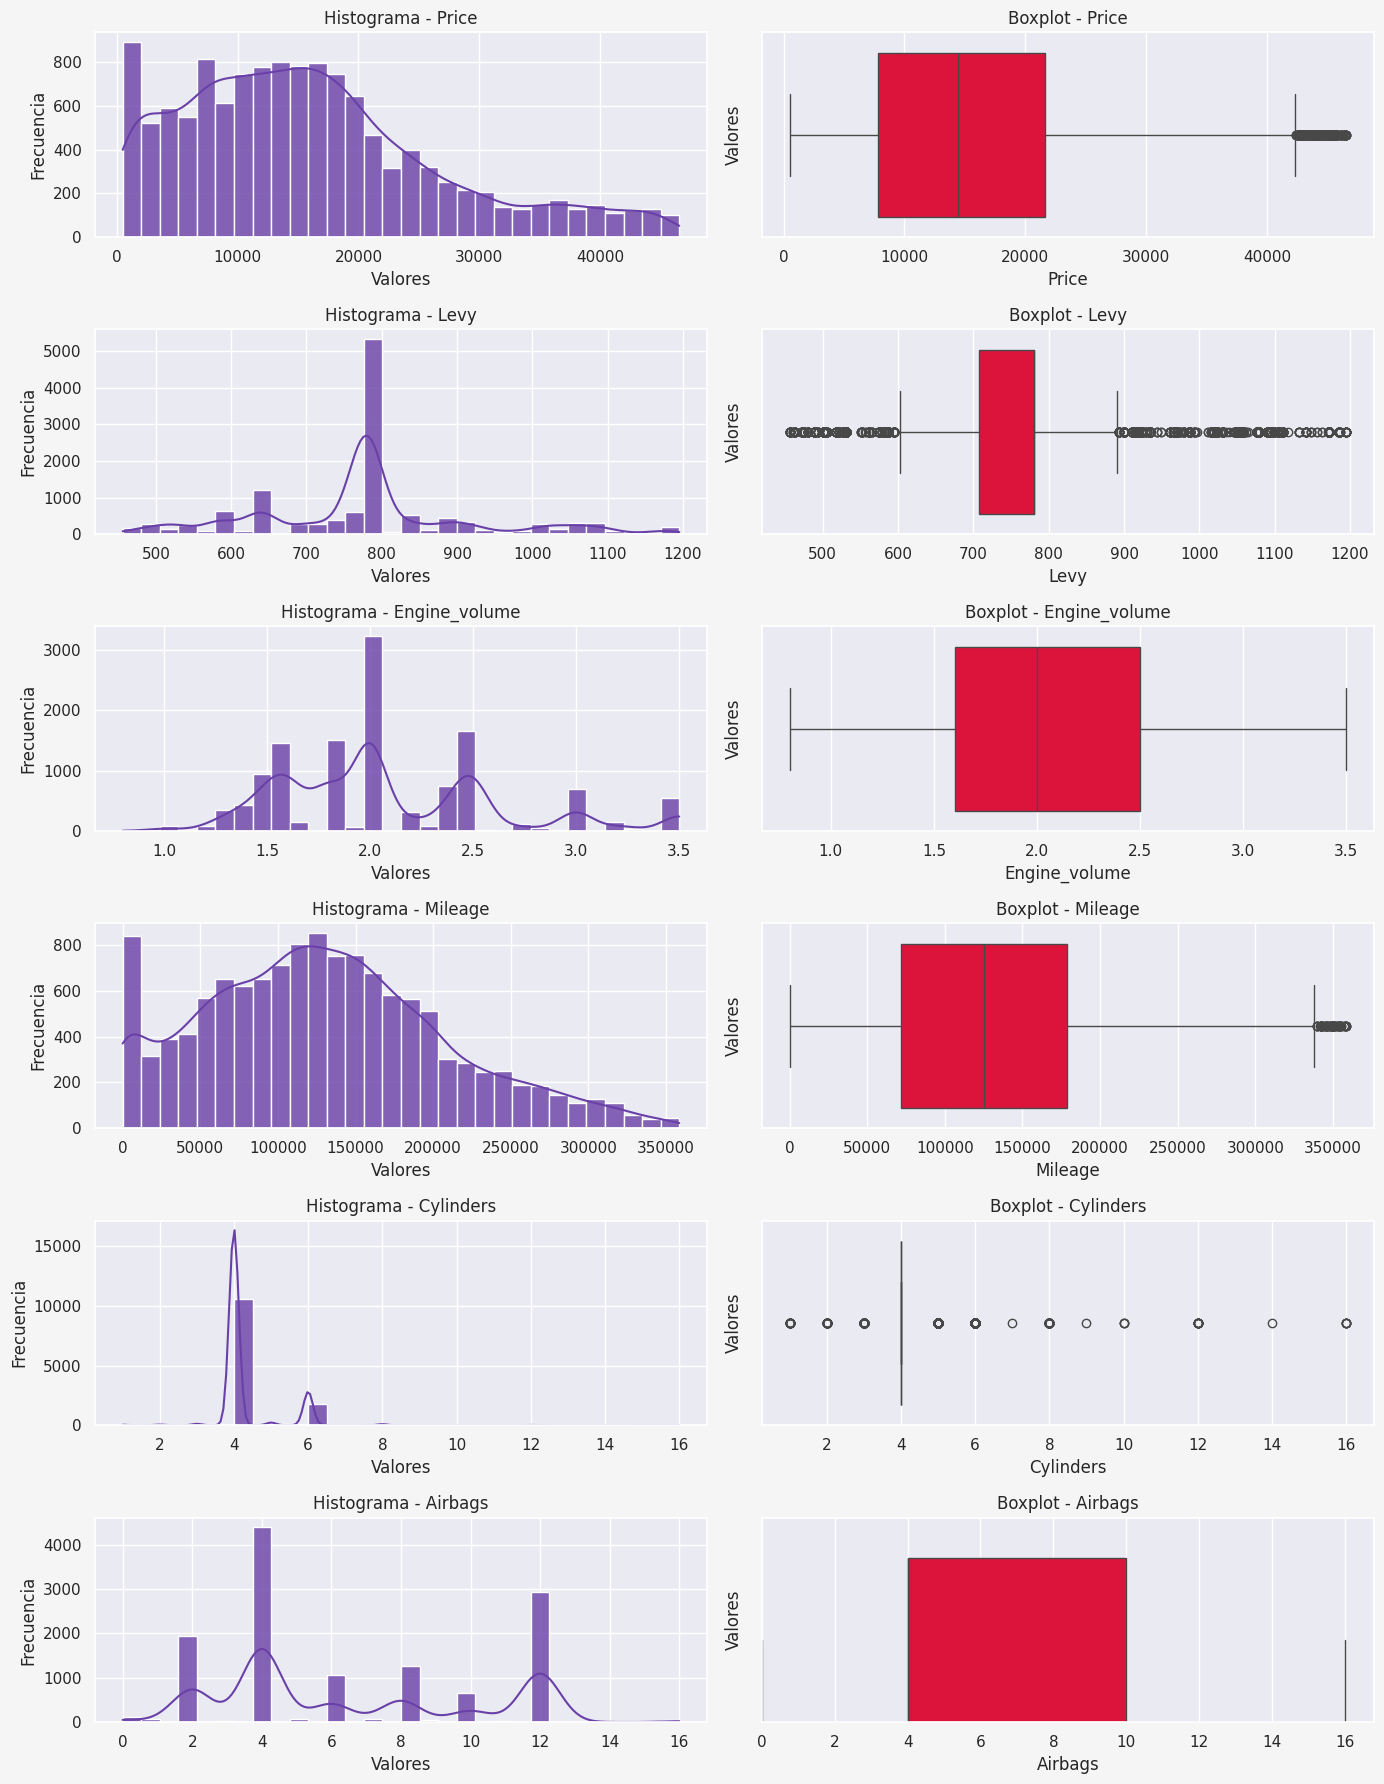

In [36]:
columnas_seleccionadas = ['Price', 'Levy','Engine_volume', 'Mileage','Cylinders', 'Airbags']

# Prepara una grilla de subplots con un gris claro
sns.set_theme(style='darkgrid')
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(14, 18), facecolor='whitesmoke')

# Itera a través de las columnas seleccionadas y hace histogramas y boxplots
for i, columna in enumerate(columnas_seleccionadas):
    # Histograma
    sns.histplot(df[columna], bins=30, color='#6940A8', alpha=0.8, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histograma - {columna}')
    axes[i, 0].set_xlabel('Valores')
    axes[i, 0].set_ylabel('Frecuencia')

    # Boxplot
    sns.boxplot(x=df[columna], ax=axes[i, 1], color='crimson', boxprops=dict(facecolor='crimson'))
    axes[i, 1].set_title(f'Boxplot - {columna}')
    axes[i, 1].set_ylabel('Valores')

plt.ylim(ymin=0)
plt.xlim(xmin=0)

# Ajuste de espacio
plt.tight_layout()

# Muestra el gráfico
plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12770 entries, 1 to 19234
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             12770 non-null  int64  
 1   Levy              12770 non-null  int64  
 2   Manufacturer      12770 non-null  object 
 3   Model             12770 non-null  object 
 4   Prod_year         12770 non-null  int64  
 5   Category          12770 non-null  object 
 6   Leather_interior  12770 non-null  object 
 7   Fuel_type         12770 non-null  object 
 8   Engine_volume     12770 non-null  float64
 9   Mileage           12770 non-null  int64  
 10  Cylinders         12770 non-null  int64  
 11  Gear_box_type     12770 non-null  object 
 12  Drive_wheels      12770 non-null  object 
 13  Doors             12770 non-null  object 
 14  Wheel             12770 non-null  object 
 15  Color             12770 non-null  object 
 16  Airbags           12770 non-null  int64 

In [38]:
df.describe()

,Price,Levy,Prod_year,Engine_volume,Mileage,Cylinders,Airbags
count,12770.000000,12770.000000,12770.000000,12770.000000,12770.000000,12770.000000,12770.000000
mean,16012.401331,774.774315,2010.420282,2.082897,129797.053798,4.311355,6.473140
std,10660.454672,142.031418,5.650478,0.548212,77876.364635,0.851402,3.773185
min,500.000000,456.000000,1953.000000,0.800000,0.000000,1.000000,0.000000
25%,7840.000000,707.000000,2009.000000,1.600000,72000.000000,4.000000,4.000000
50%,14454.000000,781.000000,2012.000000,2.000000,125000.000000,4.000000,4.000000
75%,21639.000000,781.000000,2014.000000,2.500000,178609.750000,4.000000,10.000000
max,46534.000000,1195.000000,2020.000000,3.500000,358526.000000,16.000000,16.000000


### Insights

Ahora que tenemos todas las columas correctamente limpias, podemos concluir que:

Shape del dataframe: (12770 x 16)

0 valores nulos ✅

0 filas duplicadas ✅

---

Ahora la Feature `'Price'` está mucho mejor distribuída y se pueden conseguir datos mucho más correctos y realistas:

- Precio promedio: $16.012

- Precio mínimo: $500 (Sin considerar levy)

- Precio máximo: $46.534
---
Rango de fecha de producción:

- 1953 - 2010
---

`'Levy'` no es directamente proporcional al precio.

---

La densidad en `Cylinders` se concentra en "4"

##Análisis de columnas cualitativas y Feature engineering

Se hace un análisis a las columnas cualitativas ya que estas no son aceptadas por el modelo. Las columnas cuantitativas ya fueron tratadas en *Limpieza*

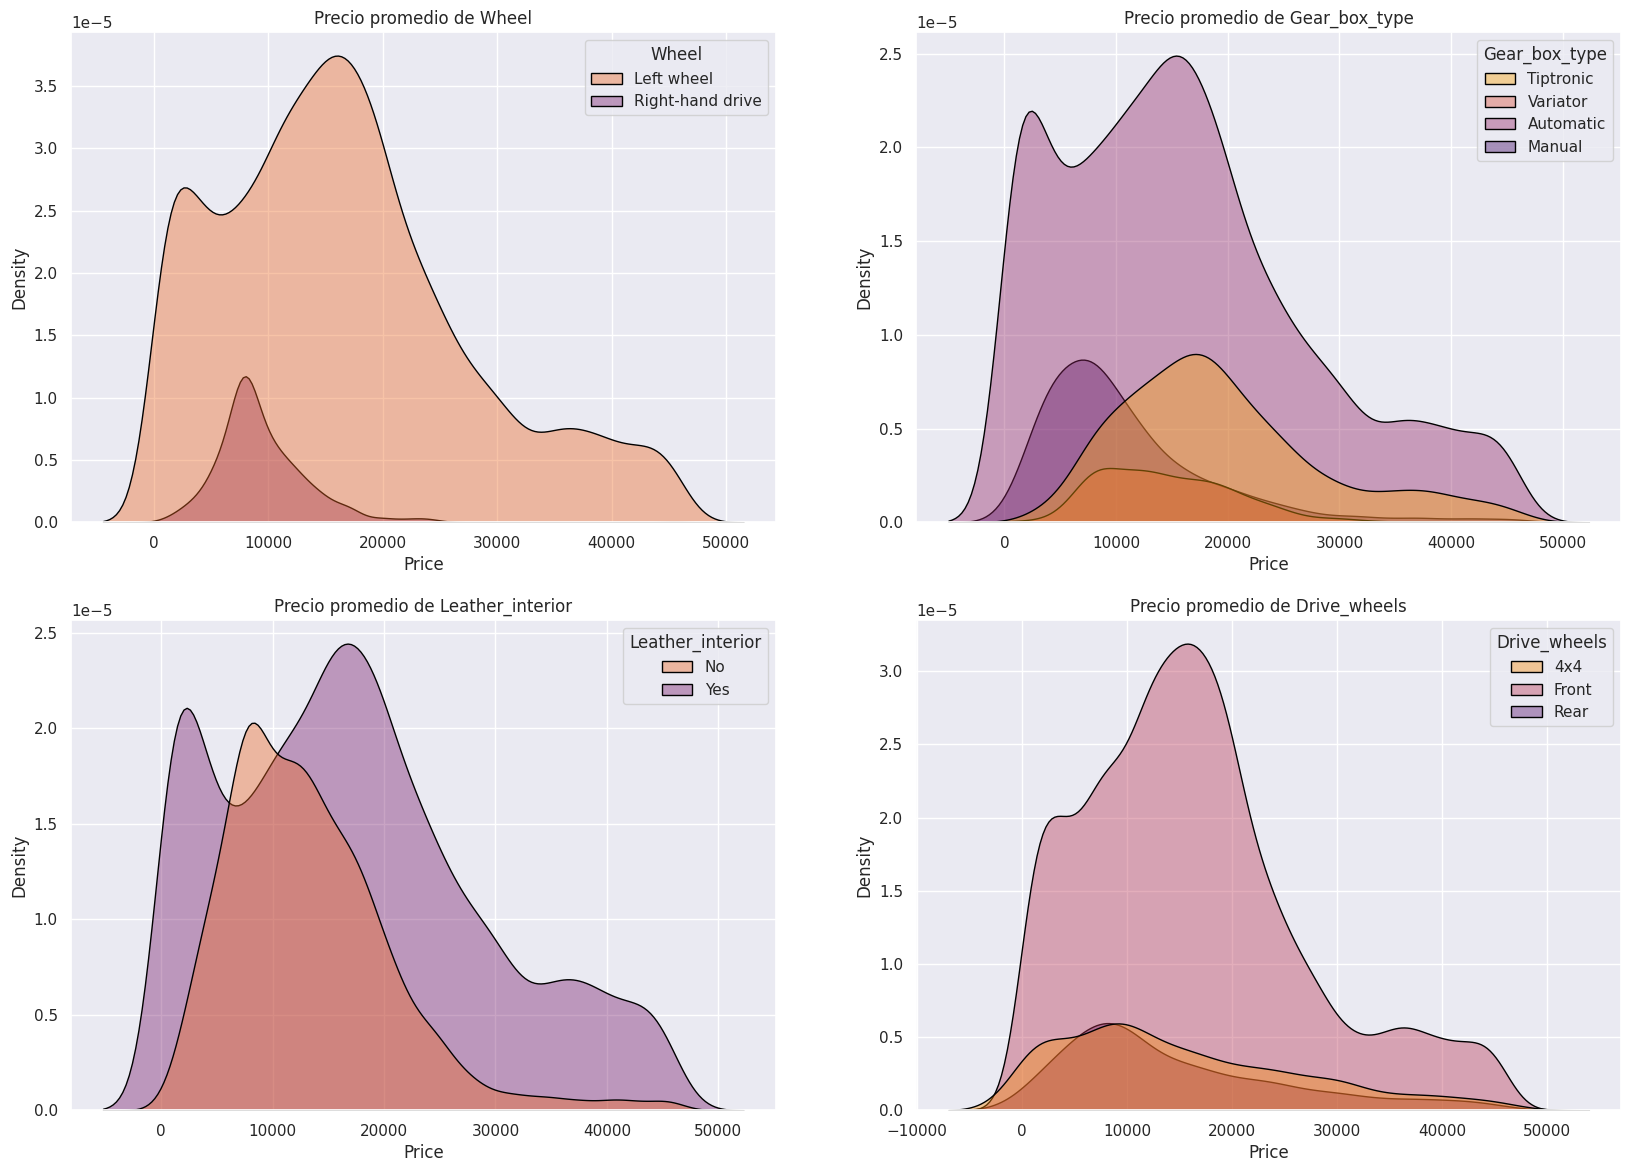

In [39]:
columnas_a_graficar_kde = ['Wheel', 'Gear_box_type', 'Leather_interior', 'Drive_wheels']
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))

#Hacemos nuestra propia paleta

# Flateneamos para simplificación de visualización
ejes = ax.flatten()

for i, columna in enumerate(columnas_a_graficar_kde):
    # Ordena los datos por el precio promedio en orden descendente
    datos_organizados = df.groupby(columna)['Price'].mean().sort_values(ascending=False).index

    sns.kdeplot(data=df, x='Price', hue=columna, ax=ejes[i], fill=True,palette='inferno_r',edgecolor='black',common_norm=True,alpha=0.4)
    ejes[i].set_title(f'Precio promedio de {columna}')

plt.show()

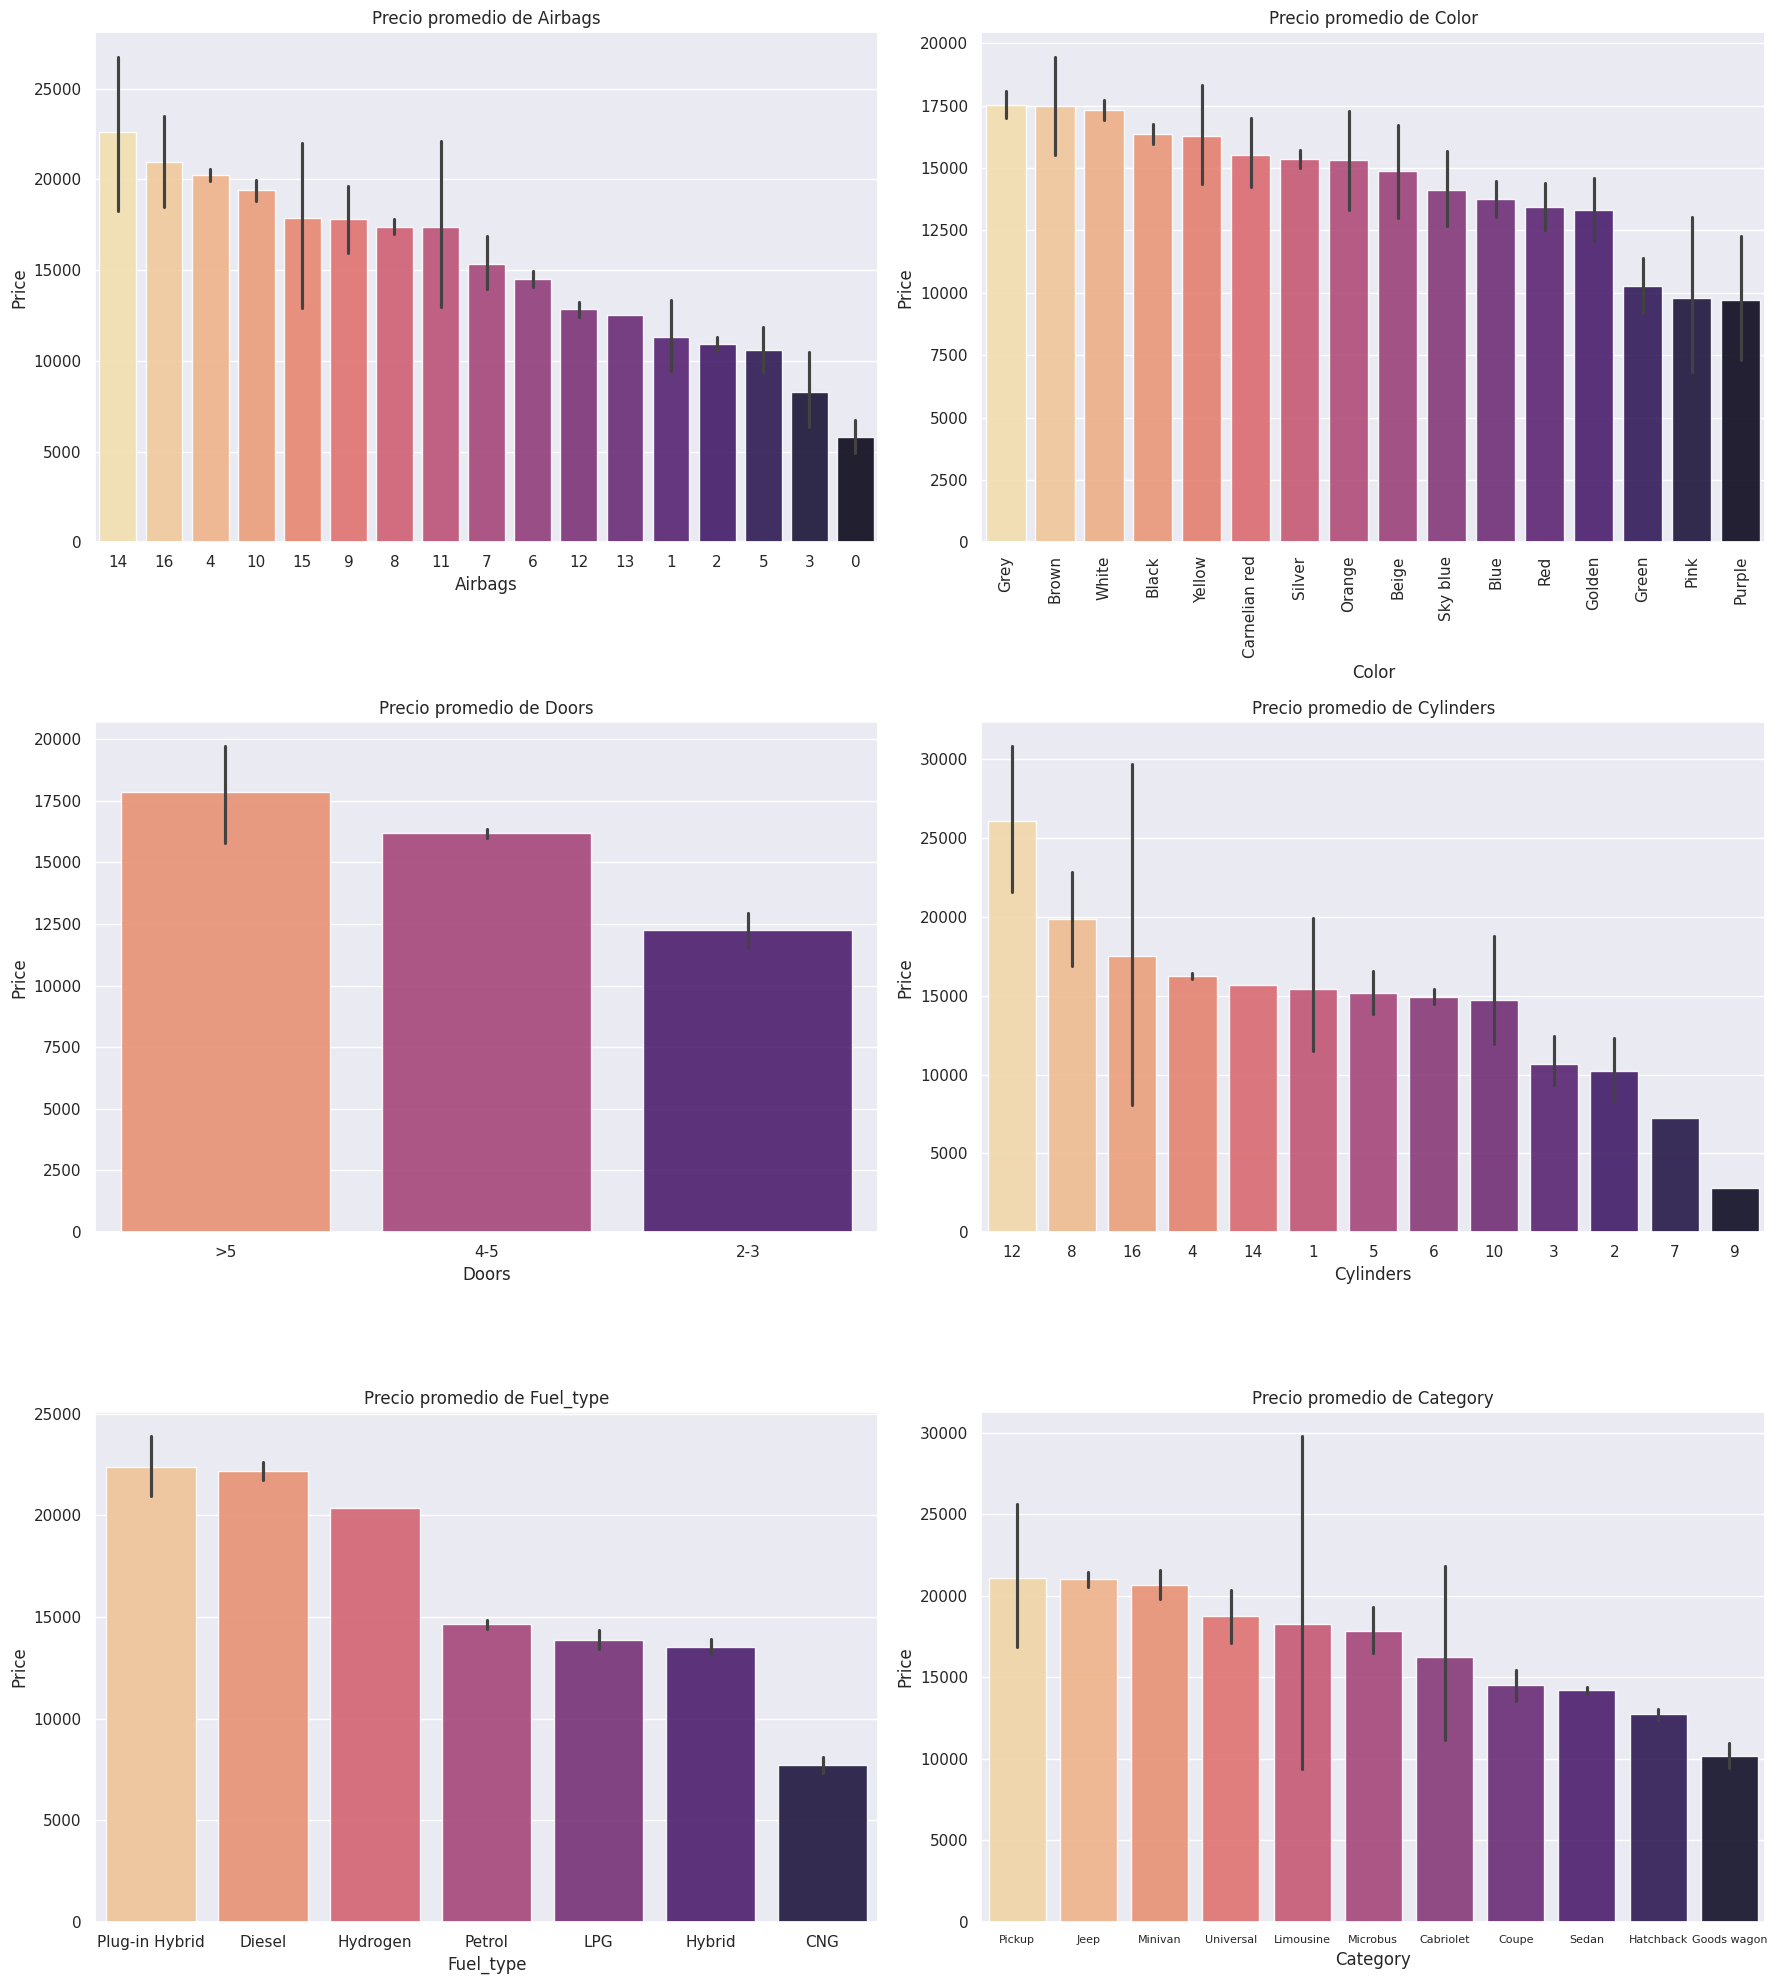

In [40]:

# Lista de columnas a graficar
columnas_a_graficar_barra = ['Airbags', 'Color', 'Doors', 'Cylinders', 'Fuel_type', 'Category']
sns.set_theme(style='darkgrid')

# Creación de grilla subplot 5x2
fig, ejes = plt.subplots(nrows=3, ncols=2, figsize=(18, 20))

# Flattenear los ejes para simplificar la visualización
ejes = ejes.flatten()

# Itera sobre las columnas y genera gráficos de barras
for i, columna in enumerate(columnas_a_graficar_barra):

    # Ordena los datos por el precio promedio en orden descendente
    datos_organizados = df.groupby(columna)['Price'].mean().sort_values(ascending=False).index

    #graficamos
    sns.barplot(x=columna, y='Price', data=df, order=datos_organizados, ax=ejes[i], palette='magma_r',alpha=0.9)

    #leyenda
    ejes[i].set_title(f'Precio promedio de {columna}')
    if columna == 'Color':
      ejes[i].tick_params(axis='x', rotation=90)   # Cambia el tamaño de la fuente del eje x porque en algunos gráficos se solapa
    if columna == 'Category':
      ejes[i].tick_params(axis='x', labelsize= 8)



# Ajustar presentación

plt.tight_layout()
plt.show()

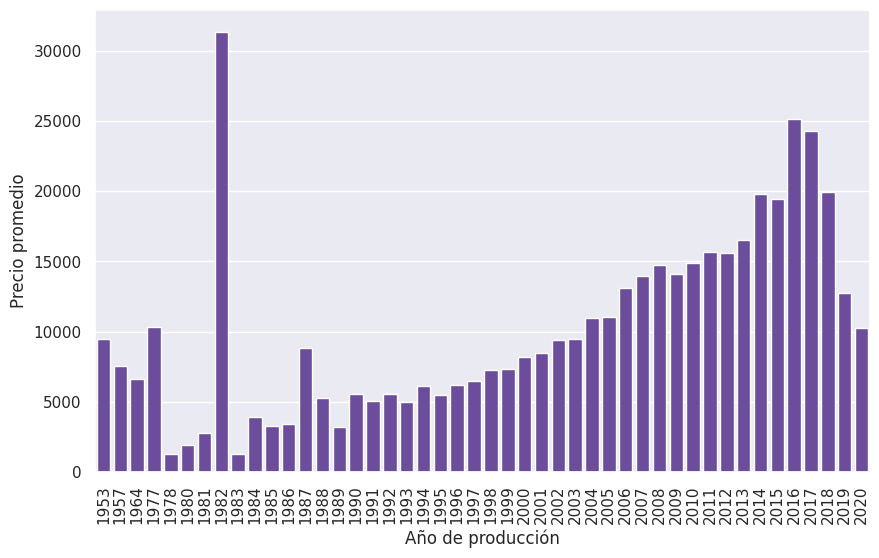

In [41]:
#Hacemos una tabla con el promedio del precio de cada año
promedio_preciosxaño = df.groupby('Prod_year')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))

#Graficamos
sns.barplot(data=promedio_preciosxaño, x='Prod_year', y='Price', color='#6940A8')

#Etiquetas
plt.xlabel('Año de producción')
plt.ylabel('Precio promedio')

#Rotamos las etiquetas del x así no se solapan entre sí
plt.xticks(rotation=90)


plt.show()

In [42]:
promedio_preciosxmarca = df.groupby('Manufacturer')['Price'].mean().reset_index()
promedio_preciosxmarca = promedio_preciosxmarca.sort_values(by='Price', ascending=False)

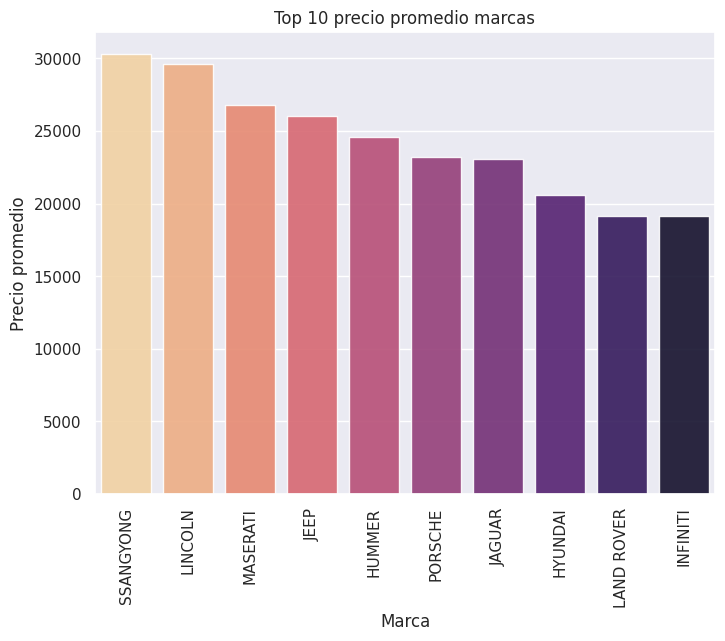

In [43]:
plt.figure(figsize=(8, 6))

#Uso de head para mostrar las 10 mejores marcas
sns.barplot(x='Manufacturer', y='Price', data=promedio_preciosxmarca.head(10), palette='magma_r',alpha=0.9)
plt.title('Top 10 precio promedio marcas')
plt.xlabel('Marca')
plt.ylabel('Precio promedio')
plt.xticks(rotation=90)

plt.show()

Marcas más caras identificadas

In [44]:
contar_categorias = df['Category'].value_counts().reset_index()
contar_categorias.columns = ['Categoria', 'Cantidad']


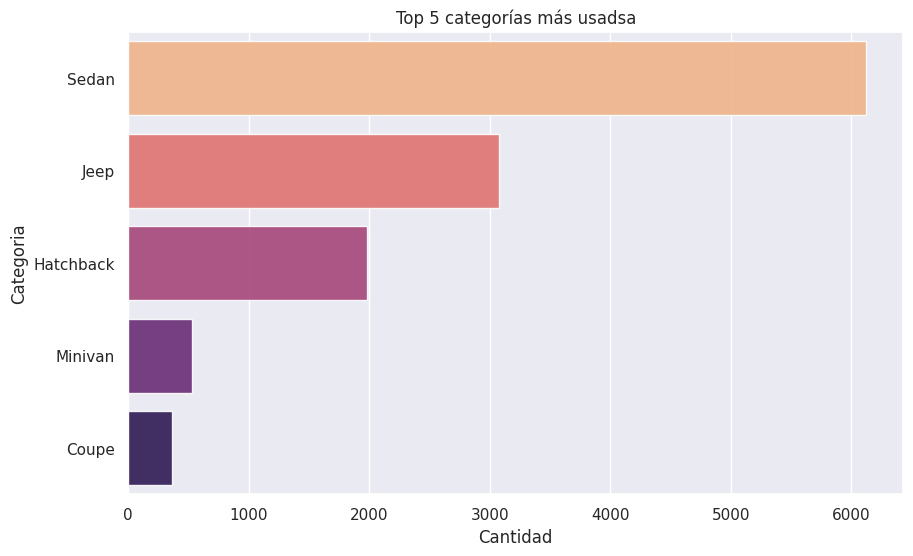

In [45]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Cantidad', y='Categoria', data=contar_categorias.head(5),palette='magma_r',alpha=0.9)
plt.xlabel('Cantidad')
plt.ylabel('Categoria')
plt.title('Top 5 categorías más usadsa')

plt.show()

In [46]:
# Feature engineering para la columna 'Prod_year', para el modelo será más fácil tratar la "antiguedad" del auto más que su año de producción
df['Prod_year'] = 2024 - df['Prod_year']
df.rename(columns={'Prod_year':'Antiquity'}, inplace = True)
df['Antiquity']
df['Antiquity'].unique()

array([13, 18,  8, 14, 11, 17, 10, 27,  6, 12, 23, 29, 16,  9, 20,  5, 26,
       34, 15, 19, 25,  7, 21, 28, 22, 24, 32, 36, 47, 35, 30, 31, 40, 38,
       33, 41, 60,  4, 37, 39, 67, 44, 46, 42, 43, 71])

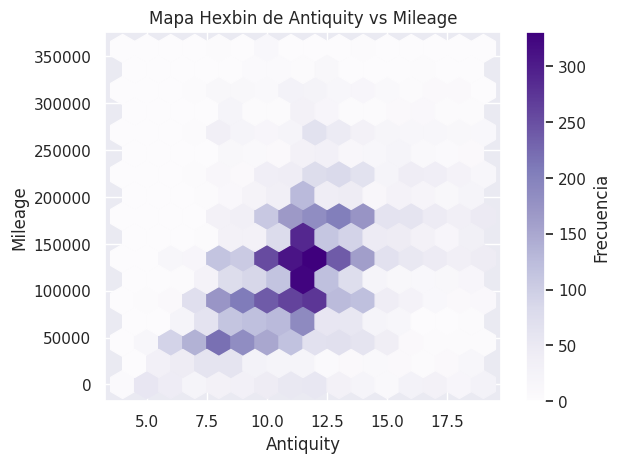

In [47]:
# Segmentamos la info para que se pueda visualizar bien el gráfico
menos_antiguos = df[df['Antiquity'] < 20]


plt.hexbin(x=menos_antiguos['Antiquity'],y=menos_antiguos['Mileage'],gridsize=15,cmap='Purples')
plt.colorbar(label='Frecuencia')
plt.xlabel('Antiquity')
plt.ylabel('Mileage')
plt.title('Mapa Hexbin de Antiquity vs Mileage')

plt.show()

###Matriz de correlación

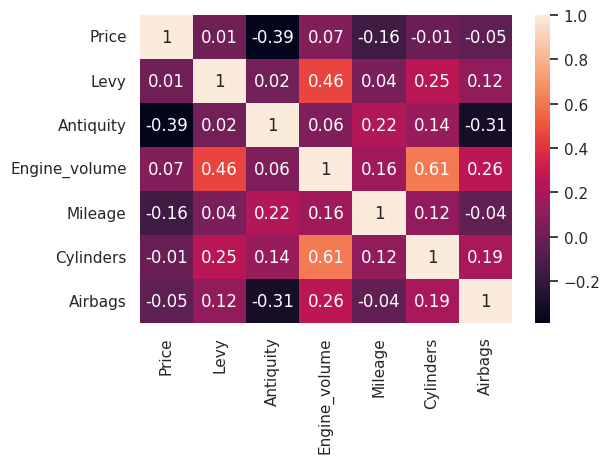

In [48]:
columnas_numericas = df.select_dtypes(include=['int64', 'float64'])
matriz_corr = columnas_numericas.corr().round(2)

plt.figure(figsize=(6,4))

sns.heatmap(matriz_corr, annot=True)
plt.show()

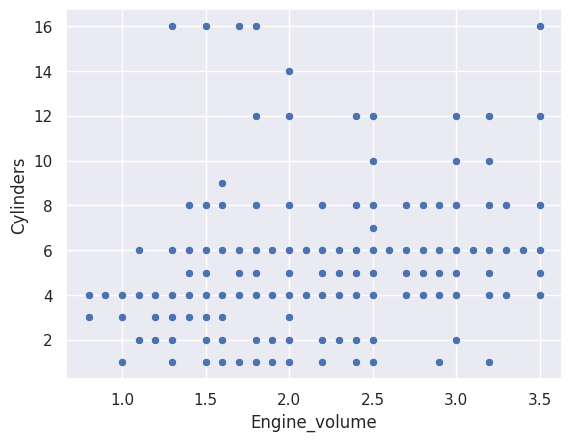

In [49]:
sns.scatterplot(data=df,x='Engine_volume',y='Cylinders');

####Conculsiones



- La variable `Price` tiene correlación negativa con `Antiquity` (-0.40) y una menor correlación positiva con `Engine_volume` (0.07).
  Esto significa que vehículos más antiguos tienden a tener precios más bajos 📉, mientras que los vehículos con motores más grandes tienden a tener precios más altos📈.

- `Engine_volume` tiene cierta correlación con `Mileage` (0.15) y una correlación alta con `Cylinders` (0.59). Esto indica que los vehículos con motores más grandes tienden a tener una mayor cilindrada y a su vez, más capacidad y mejor rendimiento para recorrer distancias más grandes.

- Por otro lado, `Antiquity` tiene una correlación bastante negativa con el precio (-0.40) y los airbags (-0,31), lo que indica que la antigüedad del vehículo puede tener un impacto importante en su precio y cantidad de airbags.

- La correlación entre `Mileage` y `Antiquity` es de  (0.22). Es común que los vehículos más antiguos tengan un kilometraje más alto, ya que han estado en uso durante más tiempo.

- La variable `Levy` pese a ser un valor agregado al precio base del vehículo, tiene una correlación muy baja con `Price` (0.02), y pareciera tener más relación con el `Engine_volume`del auto (0.46)

---

Dicho, esto, se pudieron identificar posibles redundancias en los datos y tenemos una mejor comprención respecto a las relaciones lineales entre las variables.

Por ejemplo, se puede destacar la alta correlación entre `Engine_Volume` y `Cylinders`, lo cual nos sugiere que estas características nos podrían estar proporcionando información similar

O por otro lado, también se podría destacar la relación entre `Mileage` y `Antiquity` para evaluar el valor residual de un vehículo usado.

Como simplificar el modelo no es una prioridad y no se identificaron valores altamente correlacionales (+0.8), se tomó la decisión de no eliminar ninguna variable

## Transformación de los datos #1 |  Label Encoder



Transformamos todas las columnas categóricas en numéricas ya que el modelo no soporta valores != numéricos

In [50]:
#Separamos las categorías cualitativas de las cuantitativas
categoricos = df.select_dtypes(include=object)
numericos = df.select_dtypes(exclude=object)

In [51]:
#Reemplazamos todas las variables categoricas por valores numéricos enteros
#Método uitilizado: label encoder
for i in range(0, categoricos.shape[1]):
  categoricos[categoricos.columns[i]] = lab.fit_transform(categoricos.iloc[:, i])

In [77]:
#Concatenamos las filas para tener nuestro df completamente numérico
dfLE = pd.concat([numericos,categoricos],axis=1)
#dfLE de "Label Encoder"
dfLE

,Price,Levy,Antiquity,Engine_volume,Mileage,Cylinders,Airbags,Manufacturer,Model,Category,Leather_interior,Fuel_type,Gear_box_type,Drive_wheels,Doors,Wheel,Color
1,16621,1018,13,3.0,192000,6,8,6,529,4,0,5,2,0,1,0,1
2,8467,781,18,1.3,200000,4,2,18,548,3,0,5,3,1,1,1,1
3,3607,862,13,2.5,168966,4,2,13,531,4,1,2,0,0,1,0,14
5,39493,891,8,2.0,160931,4,4,20,988,4,1,1,0,1,1,0,14
6,1803,761,14,1.8,258909,4,12,52,893,3,1,2,0,1,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19227,29793,1053,10,3.5,219030,6,12,32,486,9,1,1,0,0,1,0,1
19231,5802,1055,11,3.5,107800,6,12,32,486,9,1,1,0,2,1,0,7
19232,8467,781,25,2.0,300000,4,5,32,308,1,1,0,1,2,0,0,12
19233,15681,831,13,2.4,161600,4,8,20,1012,9,1,5,2,1,1,0,11


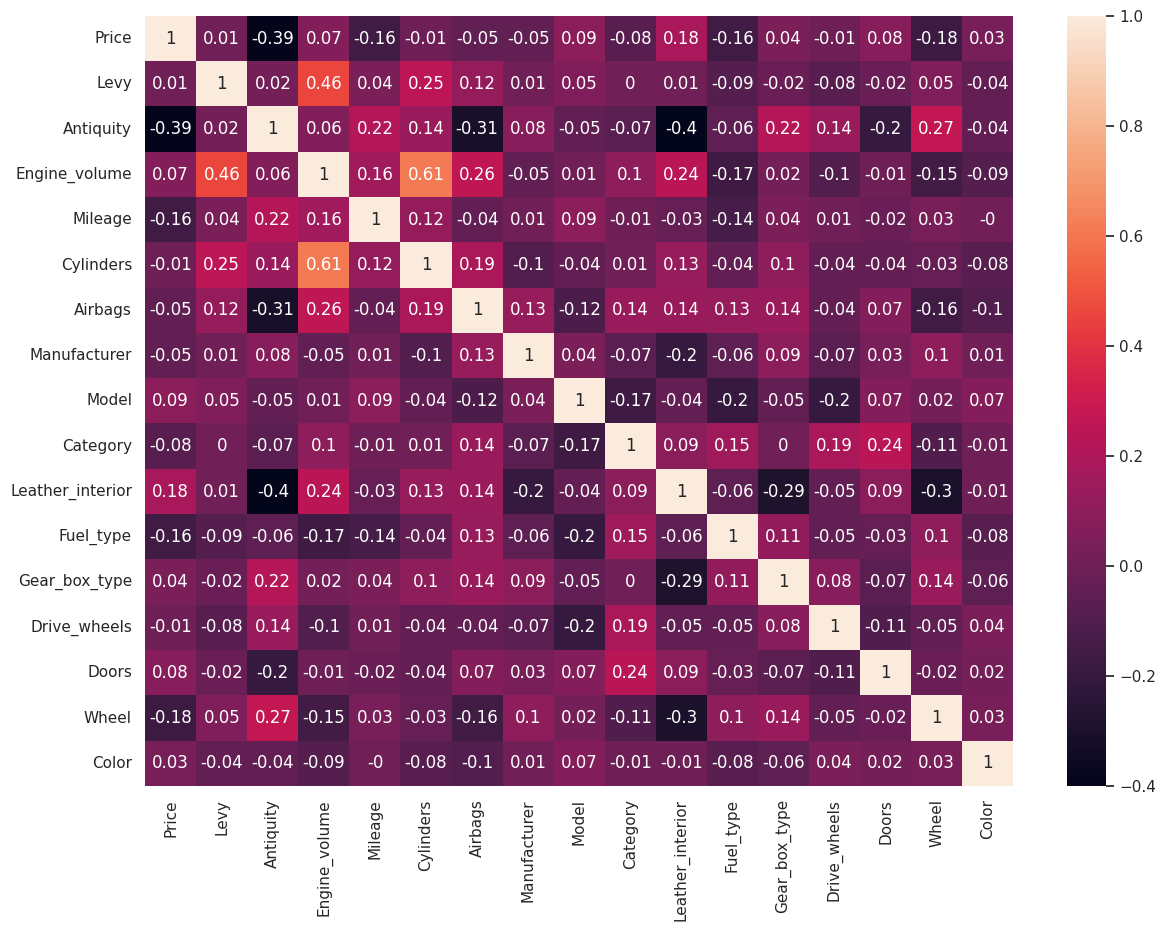

In [78]:
columnas_numericas = dfLE.select_dtypes(exclude=['object', 'category'])
matriz_corr = columnas_numericas.corr().round(2)

plt.figure(figsize=(14, 10))

sns.heatmap(matriz_corr, annot=True)
plt.show()

## Modelado 1


In [53]:
#Guardamos la feature objetivo a predecir
y=dfLE["Price"]

#Dropeamos la columna price del dataframe principal
X=dfLE.drop(["Price"],axis=1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [54]:
#Diccionario para almacenar los resultados del entrenamiento
resultados = {'Algoritmo': [], 'R2': [], 'RMSE': []}

In [55]:
# Función para ejectuar los modelos
# Esta funció ejecutará las predicciones y devolverá la puntuación de R2 y el RMSE

def modelado(modelo, X_train, X_test, y_train, y_test):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return r2, rmse


In [56]:
#Indicamos nombre y la función de ese modelo en un diccionario
modelos = {
    'LinearR': LinearRegression(),
    'DecisionTreeR': DecisionTreeRegressor(),
    'RandomForestR': RandomForestRegressor(n_estimators=100),
    'GradientBoostingR': GradientBoostingRegressor(),
    'XGBR': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=27),
    'LGBMR': lgb.LGBMRegressor(random_state=42)
}


In [57]:
for nombre, modelos in modelos.items():
    r2, rmse = modelado(modelos, X_train, X_test, y_train, y_test)
    resultados['Algoritmo'].append(nombre)
    resultados['R2'].append(r2)
    resultados['RMSE'].append(rmse)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 10216, number of used features: 16
[LightGBM] [Info] Start training from score 16008.727193


In [58]:
resultados_modelos = pd.DataFrame(resultados)
resultados_modelos

,Algoritmo,R2,RMSE
0,LinearR,0.278379,9159.194275
1,DecisionTreeR,0.607638,6753.768337
2,RandomForestR,0.805859,4750.736232
3,GradientBoostingR,0.647117,6404.981267
4,XGBR,0.791542,4922.801572
5,LGBMR,0.789846,4942.786387


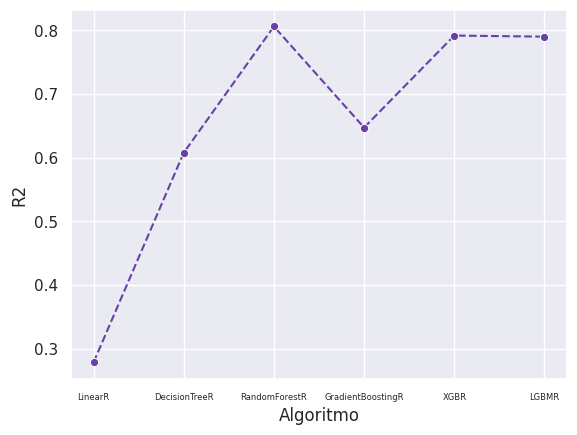

In [59]:
sns.lineplot(data=resultados_modelos,x='Algoritmo',y='R2',color='#6940A8', marker="o",linestyle='--')
plt.xticks(fontsize=6)

plt.show()

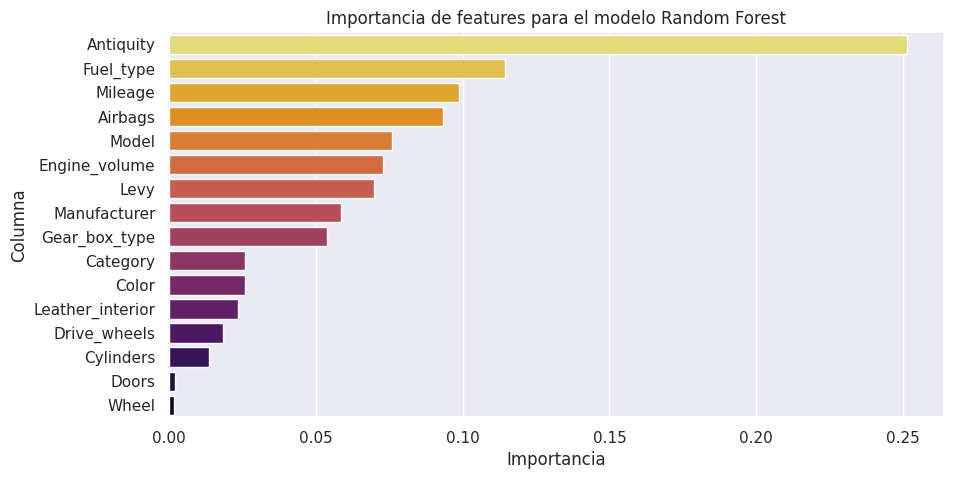

In [60]:
#FUnción similar a la anterior, pero que nos devuelve el modelo en sí
def modelo_entrenado(modelo, X_train, X_test, y_train, y_test):
    modelo_entrenado = modelo.fit(X_train, y_train)
    y_pred = modelo_entrenado.predict(X_test)
    return modelo_entrenado, y_pred

# Aplicamos la función con RandomForestRegressor, modelo que mayor puntuación tuvo
modelo_final, y_pred = modelo_entrenado(RandomForestRegressor(n_estimators=100), X_train, X_test, y_train, y_test)

importancia_columnas = modelo_final.feature_importances_
nombre_columnas = X_train.columns

# Crear un DataFrame con los nombres de características y sus importancias
importancia_columnas_df = pd.DataFrame({'Columna': nombre_columnas, 'Importancia': importancia_columnas})

# Ordenar el DataFrame por importancia en orden descendente
importancia_columnas_df = importancia_columnas_df.sort_values(by='Importancia', ascending=False)

# Seleccionar las 20 características más importantes
top_columnas = importancia_columnas_df.head(16)

# Graficar la importancia de las características para las 20 más importantes
plt.figure(figsize=(10, 5))
sns.barplot(x='Importancia', y='Columna', data=top_columnas, palette='inferno_r')
plt.title('Importancia de features para el modelo Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Columna')
plt.show()

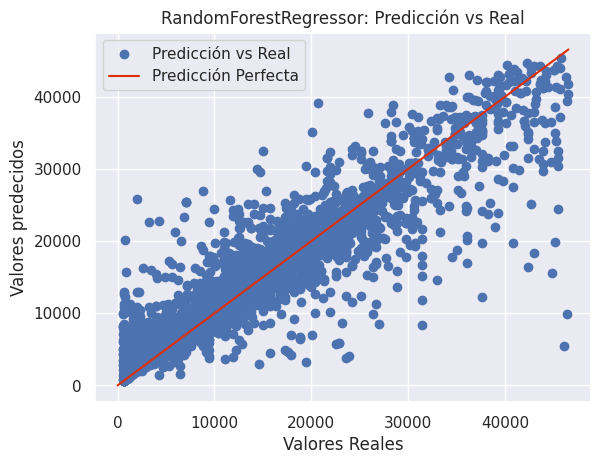

In [61]:
plt.scatter(y_test, y_pred, color='b', label='Predicción vs Real')

#Guardamos el valoor más alto entre las predicciones y los datos reales
max_value = max(np.max(y_test), np.max(y_pred))

#Plotamos la línea de predicción desde 0 hasta el valor máximo
plt.plot([0, max_value], [0, max_value], color='#de2e03', label='Predicción Perfecta')

#Labels y leyenda
plt.xlabel('Valores Reales')
plt.ylabel('Valores predecidos')
plt.title('RandomForestRegressor: Predicción vs Real')

plt.legend()

plt.show()

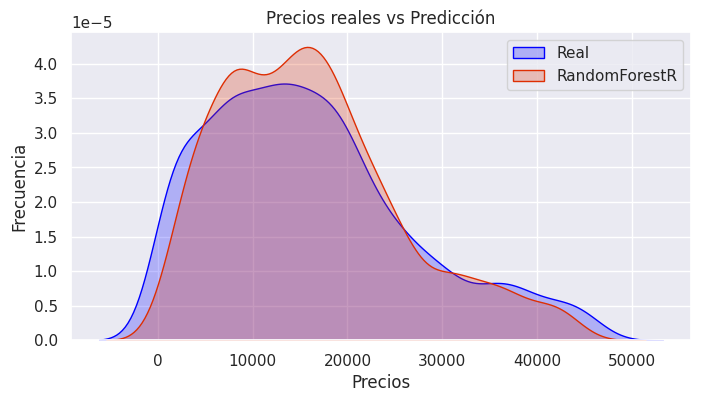

In [62]:
# Identificamos el modelo con el mejor valor de R2
nombre_mejor_modelo = resultados_modelos.loc[resultados_modelos['R2'].idxmax(), 'Algoritmo']

# Creamos un DataFrame para la comparación entre la predicción con los datos reales
comparativa = pd.DataFrame({'Real': y_test, 'Prediccion': y_pred})

# Graficamos para mostrar la diferencia entre los precios reales y la predicción
plt.figure(figsize=(8, 4))
sns.kdeplot(data=comparativa, x='Real', label='Real', fill=True, common_norm=False, color='blue')
sns.kdeplot(data=comparativa, x='Prediccion', label=(f'{nombre_mejor_modelo}'), fill=True,common_norm=False, color='#de2e03')

plt.title('Precios reales vs Predicción')
plt.xlabel('Precios')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

## Transformación de los datos #2 | LeaveOneOut


In [63]:
# Seleccionamos las columnas a codificar
columnas = ['Manufacturer', 'Model', 'Category']


print(df.columns)

# Inicializamos el LeaveOneOutEncoder
encoder = LeaveOneOutEncoder(cols=columnas)

# Ajustamos y transformamos todo el DataFrame
LOO = encoder.fit_transform(df[columnas], df['Price'])

# Concatenamos las columnas codificadas con el DataFrame original
LOO = pd.concat([LOO, LOO.add_suffix('_LOO')], axis=1)

print(LOO.columns)

# Eliminamos las columnas originales codificadas del DataFrame original
LOO = LOO.drop(columns=columnas)

print(LOO.columns)



Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Antiquity', 'Category',
       'Leather_interior', 'Fuel_type', 'Engine_volume', 'Mileage',
       'Cylinders', 'Gear_box_type', 'Drive_wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')
Index(['Manufacturer', 'Model', 'Category', 'Manufacturer_LOO', 'Model_LOO',
       'Category_LOO'],
      dtype='object')
Index(['Manufacturer_LOO', 'Model_LOO', 'Category_LOO'], dtype='object')


In [64]:
DfLOO = df.drop(columns=columnas)

#Separamos las categorías cualitativas de las cuantitativas
categoricos = df.select_dtypes(include=['object', 'category'])
columnas_numericas = df.select_dtypes(include=['int'])
for i in range(categoricos.shape[1]):
    categoricos[categoricos.columns[i]] = lab.fit_transform(categoricos.iloc[:, i])

    df = df.drop(columns=categoricos.columns[i])

DfLOO = pd.concat([categoricos, df], axis=1)


DfLOO = pd.concat([DfLOO, LOO], axis=1)


DfLOO

,Manufacturer,Model,Category,Leather_interior,Fuel_type,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Price,Levy,Antiquity,Engine_volume,Mileage,Cylinders,Airbags,Manufacturer_LOO,Model_LOO,Category_LOO
1,6,529,4,0,5,2,0,1,0,1,16621,1018,13,3.0,192000,6,8,15617.251588,8006.750000,21024.130689
2,18,548,3,0,5,3,1,1,1,1,8467,781,18,1.3,200000,4,2,13055.953226,13424.685824,12757.655746
3,13,531,4,1,2,0,0,1,0,14,3607,862,13,2.5,168966,4,2,14382.309293,12569.388235,21028.361508
5,20,988,4,1,1,0,1,1,0,14,39493,891,8,2.0,160931,4,4,20617.858889,30934.871951,21016.695059
6,52,893,3,1,2,0,1,1,0,14,1803,761,14,1.8,258909,4,12,15488.491275,14021.189702,12761.014617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19227,32,486,9,1,1,0,0,1,0,1,29793,1053,10,3.5,219030,6,12,15395.574733,13872.669202,14213.852547
19231,32,486,9,1,1,0,2,1,0,7,5802,1055,11,3.5,107800,6,12,15416.919039,13963.889734,14217.770085
19232,32,308,1,1,0,1,2,0,0,12,8467,781,25,2.0,300000,4,5,15414.548043,7436.000000,14541.906849
19233,20,1012,9,1,5,2,1,1,0,11,15681,831,13,2.4,161600,4,8,20626.176039,14027.782748,14216.156924


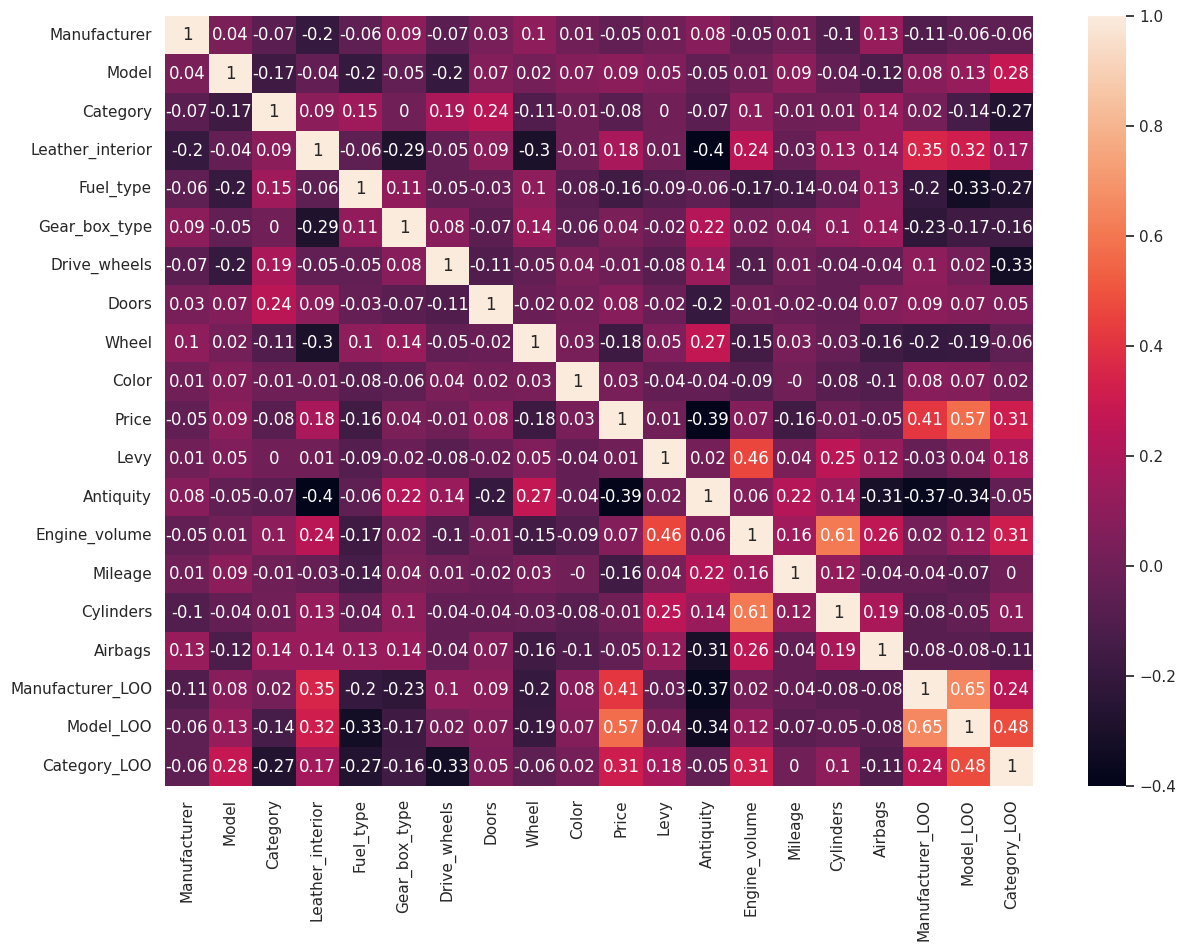

In [65]:
columnas_numericas = DfLOO.select_dtypes(exclude=['object', 'category'])
matriz_corr = columnas_numericas.corr().round(2)

plt.figure(figsize=(14, 10))

sns.heatmap(matriz_corr, annot=True)
plt.show()

## Modelado 2


In [66]:
#Guardamos la feature objetivo a predecir
y=DfLOO["Price"]

#Dropeamos la columna price del dataframe principal
X=DfLOO.drop(["Price"],axis=1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [67]:
#Diccionario para almacenar los resultados del entrenamiento
resultados = {'Algoritmo': [], 'R2': [], 'RMSE': []}

In [68]:
#Indicamos nombre y la función de ese modelo en un diccionario
modelos = {
    'LinearR': LinearRegression(),
    'DecisionTreeR': DecisionTreeRegressor(),
    'RandomForestR': RandomForestRegressor(n_estimators=100),
    'GradientBoostingR': GradientBoostingRegressor(),
    'XGBR': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=27),
    'LGBMR': lgb.LGBMRegressor(random_state=42)
}


In [69]:
for nombre, modelos in modelos.items():
    r2, rmse = modelado(modelos, X_train, X_test, y_train, y_test)
    resultados['Algoritmo'].append(nombre)
    resultados['R2'].append(r2)
    resultados['RMSE'].append(rmse)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1606
[LightGBM] [Info] Number of data points in the train set: 10216, number of used features: 19
[LightGBM] [Info] Start training from score 16008.727193


In [70]:
resultados_modelos = pd.DataFrame(resultados)
resultados_modelos

,Algoritmo,R2,RMSE
0,LinearR,0.458464,7934.444045
1,DecisionTreeR,0.963688,2054.611508
2,RandomForestR,0.988522,1155.166120
3,GradientBoostingR,0.954095,2310.109927
4,XGBR,0.986784,1239.535050
5,LGBMR,0.985184,1312.410414


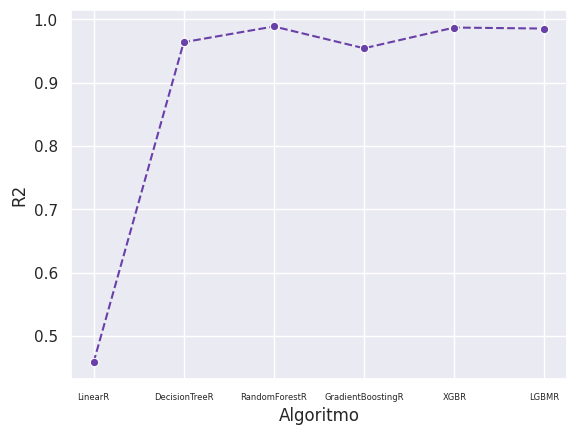

In [71]:
sns.lineplot(data=resultados_modelos,x='Algoritmo',y='R2',color='#6940A8', marker="o",linestyle='--')
plt.xticks(fontsize=6)

plt.show()

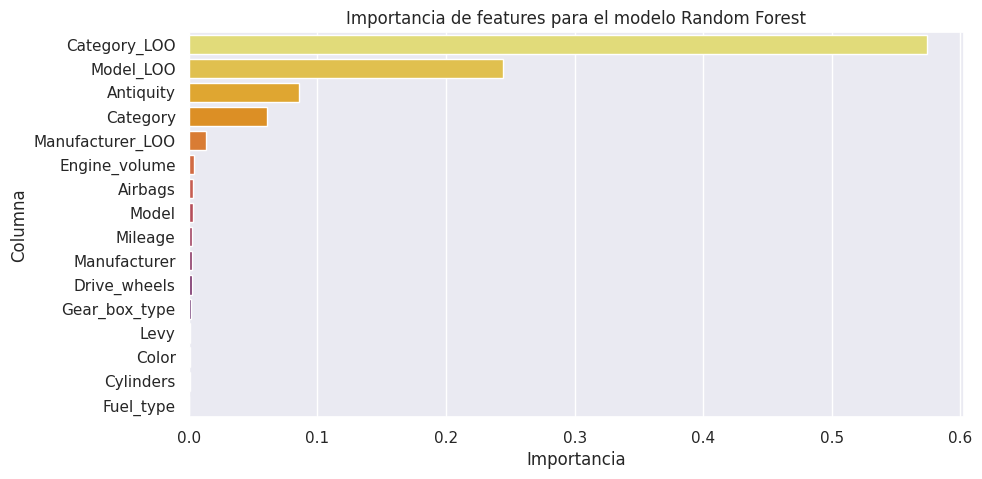

In [72]:
#FUnción similar a la anterior, pero que nos devuelve el modelo en sí
def modelo_entrenado(modelo, X_train, X_test, y_train, y_test):
    modelo_entrenado = modelo.fit(X_train, y_train)
    y_pred = modelo_entrenado.predict(X_test)
    return modelo_entrenado, y_pred

# Aplicamos la función con RandomForestRegressor, modelo que mayor puntuación tuvo
modelo_final, y_pred = modelo_entrenado(RandomForestRegressor(n_estimators=100), X_train, X_test, y_train, y_test)

importancia_columnas = modelo_final.feature_importances_
nombre_columnas = X_train.columns

# Crear un DataFrame con los nombres de características y sus importancias
importancia_columnas_df = pd.DataFrame({'Columna': nombre_columnas, 'Importancia': importancia_columnas})

# Ordenar el DataFrame por importancia en orden descendente
importancia_columnas_df = importancia_columnas_df.sort_values(by='Importancia', ascending=False)

# Seleccionar las 20 características más importantes
top_columnas = importancia_columnas_df.head(16)

# Graficar la importancia de las características para las 20 más importantes
plt.figure(figsize=(10, 5))
sns.barplot(x='Importancia', y='Columna', data=top_columnas, palette='inferno_r')
plt.title('Importancia de features para el modelo Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Columna')
plt.show()

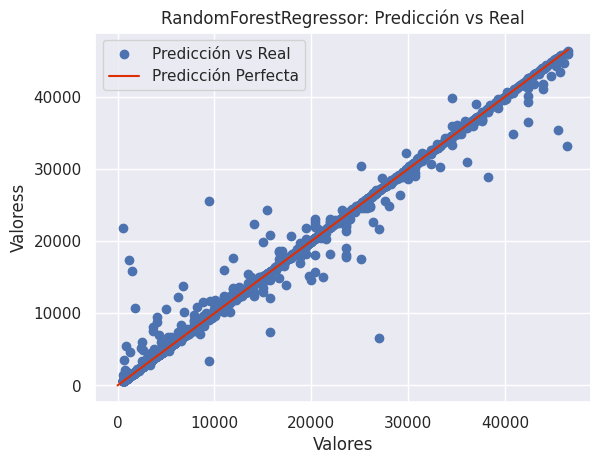

In [75]:
plt.scatter(y_test, y_pred, color='b', label='Predicción vs Real')

#Guardamos el valoor más alto entre las predicciones y los datos reales
max_value = max(np.max(y_test), np.max(y_pred))

#Plotamos la línea de predicción desde 0 hasta el valor máximo
plt.plot([0, max_value], [0, max_value], color='#de2e03', label='Predicción Perfecta')

#Labels y leyenda
plt.xlabel('Valores')
plt.ylabel('Valores')
plt.title('RandomForestRegressor: Predicción vs Real')

plt.legend()

plt.show()

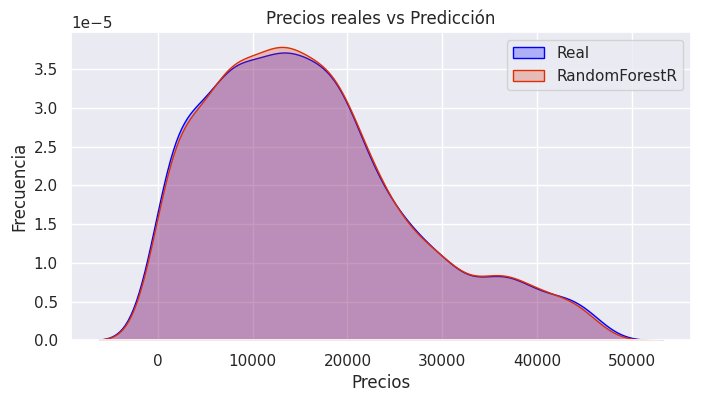

In [74]:
# Identificamos el modelo con el mejor valor de R2
nombre_mejor_modelo = resultados_modelos.loc[resultados_modelos['R2'].idxmax(), 'Algoritmo']

# Creamos un DataFrame para la comparación entre la predicción con los datos reales
comparativa = pd.DataFrame({'Real': y_test, 'Prediccion': y_pred})

# Graficamos para mostrar la diferencia entre los precios reales y la predicción
plt.figure(figsize=(8, 4))
sns.kdeplot(data=comparativa, x='Real', label='Real', fill=True, common_norm=False, color='blue')
sns.kdeplot(data=comparativa, x='Prediccion', label=(f'{nombre_mejor_modelo}'), fill=True,common_norm=False, color='#de2e03')

plt.title('Precios reales vs Predicción')
plt.xlabel('Precios')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()